In [17]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score,
    roc_auc_score, roc_curve, accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
# Load from CSV (Kaggle version)
df = pd.read_csv(r"C:\Users\DELL\Downloads\cancerprediction\data.csv")

# Preview
print(df.head())
print(df.isnull().sum())  # Check for NaN values

# Drop ID columns or unnecessary text features if any
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# Convert target to binary (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})



         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [19]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict probabilities and classes
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities of class 1


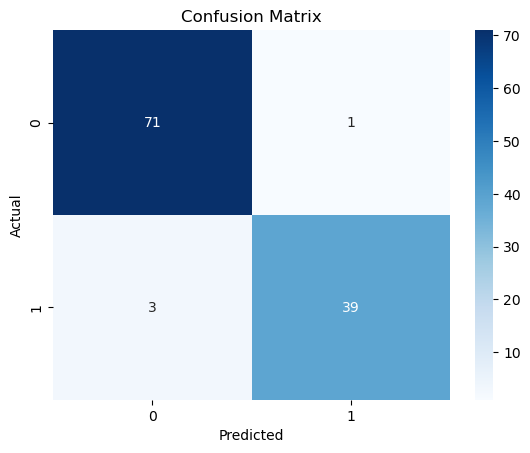

Precision: 0.97
Recall: 0.93
ROC-AUC: 1.00
Accuracy: 0.96


In [21]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")


In [22]:
# Change threshold
threshold = 0.3  # Try 0.3 instead of default 0.5
y_pred_thresh = (y_prob >= threshold).astype(int)

# Evaluate at new threshold
precision = precision_score(y_test, y_pred_thresh)
recall = recall_score(y_test, y_pred_thresh)

print(f"[Threshold = {threshold}] Precision: {precision:.2f}, Recall: {recall:.2f}")


[Threshold = 0.3] Precision: 0.98, Recall: 0.98


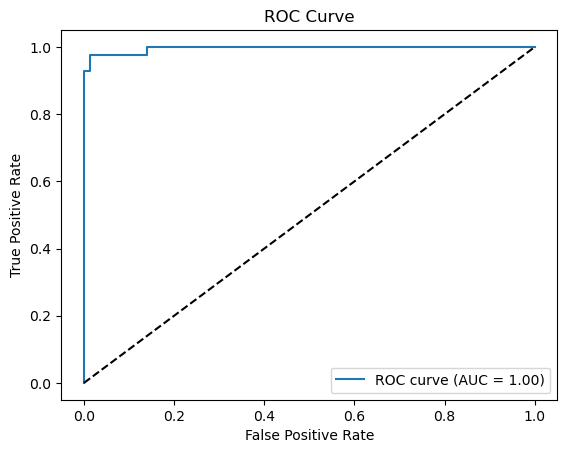

In [23]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
